# Accessing Databases via Web APIs
* * * * *

In [4]:
# Import required libraries
import requests
import json
from __future__ import division
import math
import csv
import matplotlib.pyplot as plt

## 1. Constructing API GET Request
*****

In the first place, we know that every call will require us to provide:

1. a base URL for the API, 
2. some authorization code or key, and 
3. a format for the response. 

So let's put store those in some variables.

Use the following demonstration keys for now, but in the future, get your own!

1. ef9055ba947dd842effe0ecf5e338af9:15:72340235
2. 25e91a4f7ee4a54813dca78f474e45a0:15:73273810
3. e15cea455f73cc47d6d971667e09c31c:19:44644296
4. b931c838cdb745bbab0f213cfc16b7a5:12:44644296
5. 1dc1475b6e7d5ff5a982804cc565cd0b:6:44644296
6. 18046cd15e21e1b9996ddfb6dafbb578:4:44644296
7. be8992a420bfd16cf65e8757f77a5403:8:44644296

In [1]:
# set key
#key="be8992a420bfd16cf65e8757f77a5403:8:44644296"
key="V8Xa3CrnMkMe2mD983mGxLXA3zxbAynY"

# set base url
base_url="http://api.nytimes.com/svc/search/v2/articlesearch"

# set response format
response_format=".json"

You often want to send some sort of data in the URL’s query string. This data tells the API what information you want. In our case, we want articles about Duke Ellington. Requests allows you to provide these arguments as a dictionary, using the `params` keyword argument. In addition to the search term `q`, we have to put in the `api-key` term.

In [2]:
# set search parameters
search_params = {"q":"Duke Ellington",
                 "api-key":key}       

Now we're ready to make the request. We use the `.get` method from the `requests` library to make an HTTP GET Request.

In [5]:
# make request
r = requests.get(base_url+response_format, params=search_params)

Now, we have a [response](http://docs.python-requests.org/en/latest/api/#requests.Response) object called `r`. We can get all the information we need from this object. For instance, we can see that the URL has been correctly encoded by printing the URL. Click on the link to see what happens.

In [6]:
print(r.url)

http://api.nytimes.com/svc/search/v2/articlesearch.json?q=Duke+Ellington&api-key=V8Xa3CrnMkMe2mD983mGxLXA3zxbAynY


Click on that link to see it returns!

### Challenge 1:  Adding a date range

What if we only want to search within a particular date range? The NYT Article Api allows us to specify start and end dates.

Alter the `search_params` code above so that the request only searches for articles in the year 2015.

You're gonna need to look at the documentation [here](http://developer.nytimes.com/docs/read/article_search_api_v2) to see how to do this.

In [7]:
# set search parameters
search_params = {"q":"Duke Ellington",
                 "api-key":key,
                 "begin_date": "20200101", # date must be in YYYYMMDD format
                 "end_date": "20201231"}

# Uncomment to test
r = requests.get(base_url+response_format, params=search_params)
print(r.url)

http://api.nytimes.com/svc/search/v2/articlesearch.json?q=Duke+Ellington&api-key=V8Xa3CrnMkMe2mD983mGxLXA3zxbAynY&begin_date=20200101&end_date=20201231


### Challenge 2:  Specifying a results page

The above will return the first 10 results. To get the next ten, you need to add a "page" parameter. Change the search parameters above to get the second 10 resuls. 

In [9]:
search_params["page"] = 1

# Uncomment to test
r = requests.get(base_url+response_format, params=search_params)
print(r.url)

http://api.nytimes.com/svc/search/v2/articlesearch.json?q=Duke+Ellington&api-key=V8Xa3CrnMkMe2mD983mGxLXA3zxbAynY&begin_date=20200101&end_date=20201231&page=1


## 2. Parsing the response text
*****

We can read the content of the server’s response using `.text`

In [10]:
# Inspect the content of the response, parsing the result as text
response_text= r.text
print(response_text[:1000])

{"status":"OK","copyright":"Copyright (c) 2021 The New York Times Company. All Rights Reserved.","response":{"docs":[{"abstract":"The Apollo in Harlem has had a greater influence on American musical history than perhaps any other venue of the past century.","web_url":"https://www.nytimes.com/2020/06/25/t-magazine/harlem-apollo-theater-ella-fitzgerald.html","snippet":"The Apollo in Harlem has had a greater influence on American musical history than perhaps any other venue of the past century.","lead_paragraph":"In this series for T, the author Reggie Nadelson revisits New York institutions that have defined cool for decades, from time-honored restaurants to unsung dives.","source":"The New York Times","multimedia":[{"rank":0,"subtype":"xlarge","caption":null,"credit":null,"type":"image","url":"images/2020/06/25/t-magazine/art/apollo-slide-97W0-copy/apollo-slide-97W0-copy-articleLarge-v2.jpg","height":400,"width":600,"legacy":{"xlarge":"images/2020/06/25/t-magazine/art/apollo-slide-97W0-

What you see here is JSON text, encoded as unicode text. JSON stands for "Javascript object notation." It has a very similar structure to a python dictionary -- both are built on key/value pairs. This makes it easy to convert JSON response to a python dictionary.

In [11]:
# Convert JSON response to a dictionary
data = json.loads(response_text)
# data

That looks intimidating! But it's really just a big dictionary. Let's see what keys we got in there.

In [12]:
print(data.keys())

dict_keys(['status', 'copyright', 'response'])


In [13]:
# this is boring
data['status']

'OK'

In [14]:
# so is this
data['copyright']

'Copyright (c) 2021 The New York Times Company. All Rights Reserved.'

In [15]:
# this is what we want!
data['response']

{'docs': [{'abstract': 'The Apollo in Harlem has had a greater influence on American musical history than perhaps any other venue of the past century.',
   'web_url': 'https://www.nytimes.com/2020/06/25/t-magazine/harlem-apollo-theater-ella-fitzgerald.html',
   'snippet': 'The Apollo in Harlem has had a greater influence on American musical history than perhaps any other venue of the past century.',
   'lead_paragraph': 'In this series for T, the author Reggie Nadelson revisits New York institutions that have defined cool for decades, from time-honored restaurants to unsung dives.',
   'source': 'The New York Times',
   'multimedia': [{'rank': 0,
     'subtype': 'xlarge',
     'caption': None,
     'credit': None,
     'type': 'image',
     'url': 'images/2020/06/25/t-magazine/art/apollo-slide-97W0-copy/apollo-slide-97W0-copy-articleLarge-v2.jpg',
     'height': 400,
     'width': 600,
     'legacy': {'xlarge': 'images/2020/06/25/t-magazine/art/apollo-slide-97W0-copy/apollo-slide-97W0-

In [16]:
data['response'].keys()

dict_keys(['docs', 'meta'])

In [17]:
data['response']['meta']['hits']

54

In [18]:
# data['response']['docs']
type(data['response']['docs'])

list

That looks what we want! Let's put that in it's own variable.

In [19]:
docs = data['response']['docs']

In [20]:
docs[0]

{'abstract': 'The Apollo in Harlem has had a greater influence on American musical history than perhaps any other venue of the past century.',
 'web_url': 'https://www.nytimes.com/2020/06/25/t-magazine/harlem-apollo-theater-ella-fitzgerald.html',
 'snippet': 'The Apollo in Harlem has had a greater influence on American musical history than perhaps any other venue of the past century.',
 'lead_paragraph': 'In this series for T, the author Reggie Nadelson revisits New York institutions that have defined cool for decades, from time-honored restaurants to unsung dives.',
 'source': 'The New York Times',
 'multimedia': [{'rank': 0,
   'subtype': 'xlarge',
   'caption': None,
   'credit': None,
   'type': 'image',
   'url': 'images/2020/06/25/t-magazine/art/apollo-slide-97W0-copy/apollo-slide-97W0-copy-articleLarge-v2.jpg',
   'height': 400,
   'width': 600,
   'legacy': {'xlarge': 'images/2020/06/25/t-magazine/art/apollo-slide-97W0-copy/apollo-slide-97W0-copy-articleLarge-v2.jpg',
    'xlar

## 3. Putting everything together to get all the articles.
*****

That's great. But we only have 10 items. The original response said we had 93 hits! Which means we have to make 93 /10, or 10 requests to get them all. Sounds like a job for a loop! 

But first, let's review what we've done so far.

In [25]:
# set key
key="V8Xa3CrnMkMe2mD983mGxLXA3zxbAynY"

# set base url
base_url="http://api.nytimes.com/svc/search/v2/articlesearch"

# set response format
response_format=".json"

# set search parameters
search_params = {"q":"Duke Ellington",
                 "api-key":key,
                 "begin_date":"20190101", # date must be in YYYYMMDD format
                 "end_date":"20191231"}

# make request
r = requests.get(base_url+response_format, params=search_params)
    
# convert to a dictionary
data=json.loads(r.text)
    
# get number of hits
hits = data['response']['meta']['hits']
print("number of hits: ", str(hits))
    
# get number of pages
pages = int(math.ceil(hits/10))
    
# make an empty list where we'll hold all of our docs for every page
all_docs = [] 
    
# now we're ready to loop through the pages
for i in range(pages):
    print("collecting page", str(i))
        
    # set the page parameter
    search_params['page'] = i
        
    # make request
    r = requests.get(base_url+response_format, params=search_params)
    
    # get text and convert to a dictionary
    data=json.loads(r.text)
        
    # get just the docs
    docs = data['response']['docs']
        
    # add those docs to the big list
    all_docs = all_docs + docs

number of hits:  73
collecting page 0
collecting page 1
collecting page 2
collecting page 3
collecting page 4
collecting page 5
collecting page 6
collecting page 7


In [26]:
len(all_docs)

73

### Challenge 3: Make a function

Turn the code above into a function that inputs a search `term` and a `year`, and returns all the documents containing that search term in that year.

In [22]:
# DEFINE YOUR FUNCTION HERE

def get_api_data(term, year):
    # set base url
    base_url="http://api.nytimes.com/svc/search/v2/articlesearch"

    # set response format
    response_format=".json"

    # set search parameters
    search_params = {"q":term,
                 "api-key":key,
                 "begin_date": str(year) + "0101", # date must be in YYYYMMDD format
                 "end_date":str(year) + "1231"}

    # make request
    r = requests.get(base_url+response_format, params=search_params)
    
    # convert to a dictionary
    data=json.loads(r.text)
    
    # get number of hits
    hits = data['response']['meta']['hits']
    print("number of hits:", str(hits))
    
    # get number of pages
    pages = int(math.ceil(hits/10))
    
    # make an empty list where we'll hold all of our docs for every page
    all_docs = [] 
    
    # now we're ready to loop through the pages
    for i in range(pages):
        print("collecting page", str(i))
        
        # set the page parameter
        search_params['page'] = i
        
        # make request
        r = requests.get(base_url+response_format, params=search_params)
    
        # get text and convert to a dictionary
        data=json.loads(r.text)
        
        # get just the docs
        docs = data['response']['docs']
        
        # add those docs to the big list
        all_docs = all_docs + docs
        
    return(all_docs)

In [29]:
# uncomment to test
# get_api_data("Duke Ellington", 2014)

## 4. Formatting
*****

Let's take another look at one of these documents.

In [30]:
all_docs[0]

{'_id': '56589a42798810178305b04b',
 'abstract': 'Concerts celebrating the jazz great will take place Sunday evening and Nov. 29 will be designated “Billy Strayhorn Day.”',
 'blog': [],
 'byline': {'original': 'By ANDREW R. CHOW',
  'person': [{'firstname': 'Andrew',
    'lastname': 'CHOW',
    'middlename': 'R.',
    'organization': '',
    'rank': 1,
    'role': 'reported'}]},
 'document_type': 'blogpost',
 'headline': {'kicker': 'ArtsBeat',
  'main': 'New York Celebrates Billy Strayhorn&#8217;s Centennial With Special &#8216;A Train&#8217; Ride',
  'print_headline': 'Celebrating Strayhorn'},
 'keywords': [{'name': 'persons', 'rank': '1', 'value': 'Ellington, Duke'},
  {'name': 'persons', 'rank': '2', 'value': 'Marsalis, Wynton'},
  {'name': 'organizations', 'rank': '1', 'value': 'Jazz at Lincoln Center'},
  {'name': 'organizations', 'rank': '2', 'value': 'New York Transit Museum'},
  {'name': 'subject', 'rank': '1', 'value': 'Jazz'},
  {'name': 'subject', 'rank': '2', 'value': 'Musi

This is all great, but it's pretty messy. What we’d really like to to have, eventually, is a CSV, with each row representing an article, and each column representing something about that article (header, date, etc). As we saw before, the best way to do this is to make a lsit of dictionaries, with each dictionary representing an article and each dictionary representing a field of metadata from that article (e.g. headline, date, etc.) We can do this with a custom function:

In [31]:
def format_articles(unformatted_docs):
    '''
    This function takes in a list of documents returned by the NYT api 
    and parses the documents into a list of dictionaries, 
    with 'id', 'header', and 'date' keys
    '''
    formatted = []
    for i in unformatted_docs:
        dic = {}
        dic['id'] = i['_id']
        dic['headline'] = i['headline']['main']
        dic['date'] = i['pub_date'][0:10] # cutting time of day.
        formatted.append(dic)
    return(formatted) 

In [32]:
all_formatted = format_articles(all_docs)

In [33]:
all_formatted[:5]

[{'date': '2015-11-27',
  'headline': 'New York Celebrates Billy Strayhorn&#8217;s Centennial With Special &#8216;A Train&#8217; Ride',
  'id': '56589a42798810178305b04b'},
 {'date': '2015-03-16',
  'headline': 'In Performance: T. Oliver Reid',
  'id': '550717ee79881074af54e288'},
 {'date': '2015-03-16',
  'headline': 'In Performance | T. Oliver Reid',
  'id': '55071c2679881074af54e29b'},
 {'date': '2015-08-31',
  'headline': 'Gary Keys, Filmmaker Who Documented Duke Ellington, Dies at 81',
  'id': '55e39f487988107ab310a7ce'},
 {'date': '2015-03-17',
  'headline': 'In Performance: T. Oliver Reid',
  'id': '550817e379881074af54e5b3'}]

### Challenge 4 Collect more fields

Edit the function above so that we include the `lead_paragraph` and `word_count` fields.

**HINT**: Some articles may not contain a lead_paragraph, in which case, it'll throw an error if you try to address this value (which doesn't exist.) You need to add a conditional statement that takes this into consideraiton. If

**Advanced**: Add another key that returns a list of `keywords` associated with the article.

In [34]:
def format_articles(unformatted_docs):
    '''
    This function takes in a list of documents returned by the NYT api 
    and parses the documents into a list of formated dictionaries, 
    with 'id', 'header', and 'date' keys
    '''
    formatted = []
    for i in unformatted_docs:
        dic = {}
        dic['id'] = i['_id']
        dic['headline'] = i['headline']['main']
        dic['date'] = i['pub_date'][0:10] # cutting time of day.
        if i['lead_paragraph']:
            dic['lead_paragraph'] = i['lead_paragraph']
        dic['word_count'] = i['word_count']
        dic['keywords'] = [keyword['value'] for keyword in i['keywords']]
        formatted.append(dic)
    return(formatted) 

In [41]:
# uncomment to test
all_formatted = format_articles(all_docs)
# all_formatted[:5]

## 5. Exporting
*****

We can now export the data to a CSV.

In [40]:
keys = all_formatted[1]
# writing the rest
with open('all-formated.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(all_formatted)

## Capstone Challenge

Using what you learned, tell me if Chris' claim (i.e. that Duke Ellington has gotten more popular lately) holds water.

In [42]:
# for this challenge, we just need the number of hits.
def get_api_hits(term, year):
    '''
    returns an integer, the number of hits (or articles) mentioning the given term
    in the given year
    '''
    # set base url
    base_url="http://api.nytimes.com/svc/search/v2/articlesearch"

    # set response format
    response_format=".json"

    # set search parameters
    search_params = {"q":term,
                 "api-key":key,
                 "begin_date": str(year) + "0101", # date must be in YYYYMMDD format
                 "end_date":str(year) + "1231"}

    # make request
    r = requests.get(base_url+response_format, params=search_params)
    
    # convert to a dictionary
    data=json.loads(r.text)
    
    # get number of hits
    hits = data['response']['meta']['hits']
    return(hits)

In [43]:
get_api_hits("Duke Ellington", 2014)

171

In [44]:
# collect data
years = range(2005, 2016)
years

all_duke = []
for i in years:
    all_duke.append(get_api_hits("Duke Ellington", i))

In [45]:
all_duke

[77, 101, 111, 99, 114, 94, 95, 66, 115, 171, 93]

[2005, 2015, 0, 200]

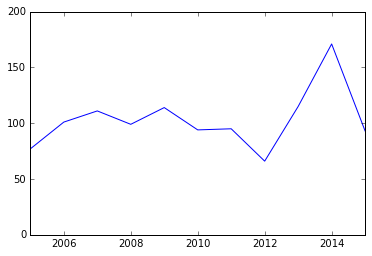

In [46]:
%matplotlib inline
plt.plot(years, all_duke)
plt.axis([2005, 2015, 0, 200])

range(0, 10)